# 2.6 Using Fuzzy Techniques for Intensity Transformations and Spatial Filtering

### Example 2.14: Using the fuzzy functions

警告: 函数处理数组输入时行为异常。要改善性能，请将您的函数正确向量化，以返回大小和形状与输入参数相同的输出。
> In matlab.graphics.function.FunctionLine>getFunction
  In matlab.graphics.function.FunctionLine/updateFunction
  In matlab.graphics.function.FunctionLine/set.Function_I
  In matlab.graphics.function.FunctionLine/set.Function
  In matlab.graphics.function.FunctionLine
  In fplot>singleFplot (line 234)
  In fplot>@(f)singleFplot(cax,{f},limits,extraOpts,args) (line 193)
  In fplot>vectorizeFplot (line 193)
  In fplot (line 163)
警告: 函数处理数组输入时行为异常。要改善性能，请将您的函数正确向量化，以返回大小和形状与输入参数相同的输出。
> In matlab.graphics.function.FunctionLine>getFunction
  In matlab.graphics.function.FunctionLine/updateFunction
  In matlab.graphics.function.FunctionLine/set.Function_I
  In matlab.graphics.function.FunctionLine/set.Function
  In matlab.graphics.function.FunctionLine
  In fplot>singleFplot (line 234)
  In fplot>@(f)singleFplot(cax,{f},limits,extraOpts,args) (line 193)
  In fplot>vectorizeFplot (line 193)
  In fplot (line 163)



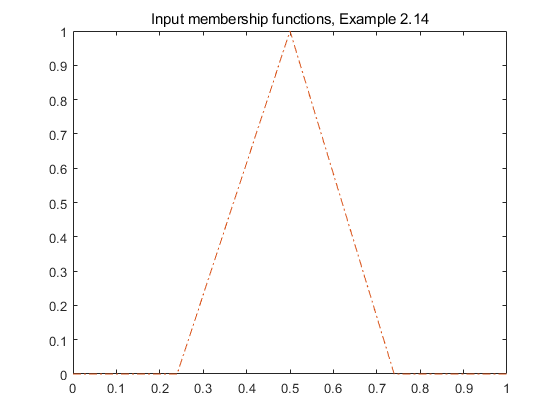

In [5]:
ulow = @(z) 1 - sigmamf(z, 0.27, 0.47);
umid = @(z) triangmf(z, 0.24, 0.50, 0.74);
uhigh = @(z) sigmamf(z, 0.53, 0.73);

fplot(ulow, [0 1], 20);
hold on
fplot(umid, [0 1], '-.', 20);
fplot(uhigh, [0 1], '--', 20);
hold off
title('Input membership functions, Example 2.14')


final_result =

    0.7619


ans =

    0.7619


ans =

    0.7619




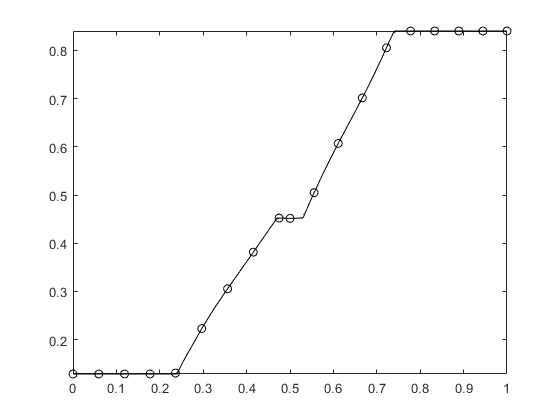

In [13]:
unorm = @(z) 1 - sigmamf(z, 0.18, 0.33);
umarg = @(z) trapezmf(z, 0.23, 0.35, 0.53, 0.69);
ufail = @(z) sigmamf(z, 0.59, 0.78);

rules = {ulow; umid; uhigh};
L = lambdafcns(rules);

z = 0.7;
outputmfs = {unorm, umarg, ufail};
Q = implfcns(L, outputmfs, z);

Qa = aggfcn(Q);

final_result = defuzzify(Qa, [0 1])

F = fuzzysysfcn(rules, outputmfs, [0 1]);
F(0.7)

G = approxfcn(F, [0 1]);
G(0.7)

fplot(F, [0 1], 'k', 20)
hold on
fplot(G, [0 1], 'k:o', 20)
hold off

In [14]:
f = @() F(0.7);
g = @() G(0.7);
t1 = timeit(f);
t2 = timeit(g);
t = t1 / t2


t =

   13.9638




## 2.6.5 Using Fuzzy Sets for Intensity Transformations

### Example 2.15 Using the fuzzy functions to implement fuzzy contrast enhancement

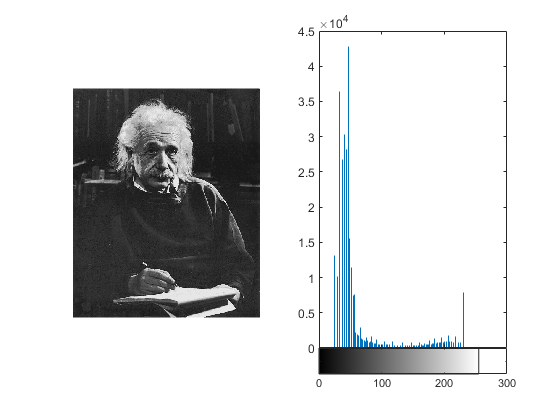

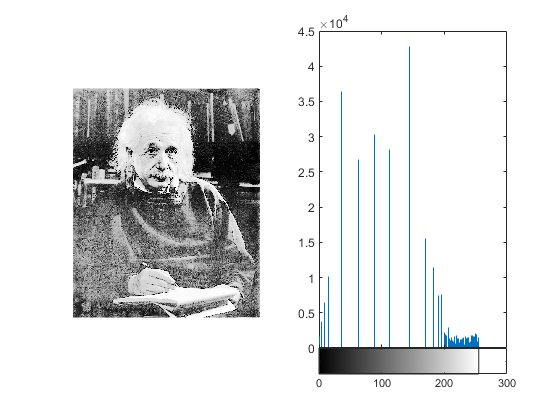

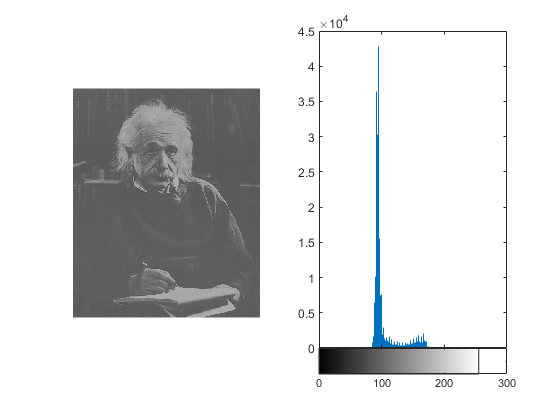

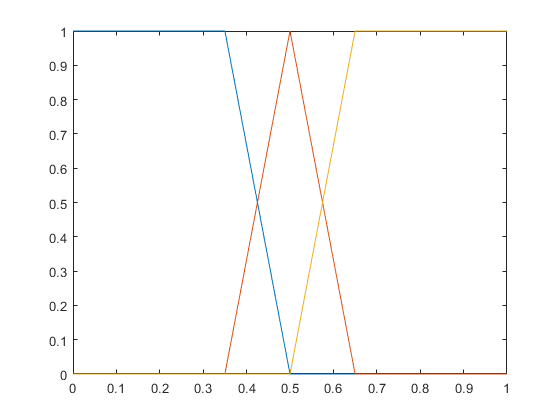

In [3]:
f = im2uint8(imread('Fig0228(a).tif'));

udark = @(z) 1 - sigmamf(z, 0.35, 0.5);
ugray = @(z) triangmf(z, 0.35, 0.5, 0.65);
ubright = @(z) sigmamf(z, 0.5, 0.65);

fplot(udark, [0 1], 20)
hold on
fplot(ugray, [0 1], 20)
fplot(ubright, [0 1], 20)

udarker = @(z) bellmf(z, 0.0, 0.1);
umidgray = @(z) bellmf(z, 0.4, 0.5);
ubrighter = @(z) bellmf(z, 0.8, 0.9);

rules = {udark; ugray; ubright};
outmf = {udarker, umidgray, ubrighter};
F = fuzzysysfcn(rules, outmf, [0 1]);

z = linspace(0, 1, 256);
T = F(z);

g = intrans(f, 'specified', T);

figure
subplot(121), imshow(f);
subplot(122), imhist(f), axis('auto');

figure
subplot(121), histeq(f, 256);
subplot(122), imhist(histeq(f, 256)), axis('auto');

figure
subplot(121), imshow(g);
subplot(122), imhist(g), axis('auto');

## 2.6.6 Using Fuzzy Sets for Spatial Filtering

### Example 2.16 Boundary detection using fuzzy, rule-based spatial filtering

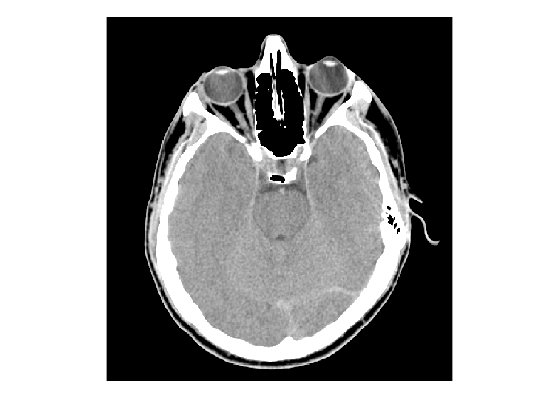

In [7]:
f = imread('Fig0233(a).tif');
imshow(f);

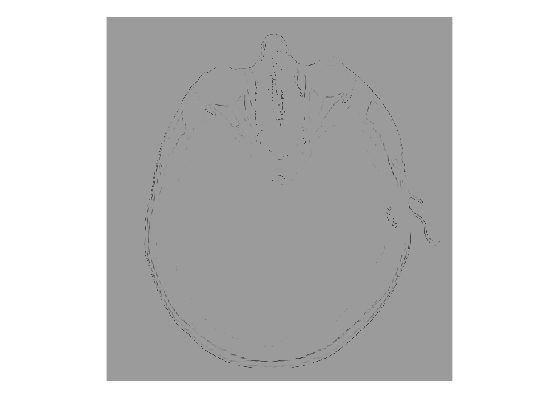

In [8]:
g = fuzzyfilt(f);
imshow(g);

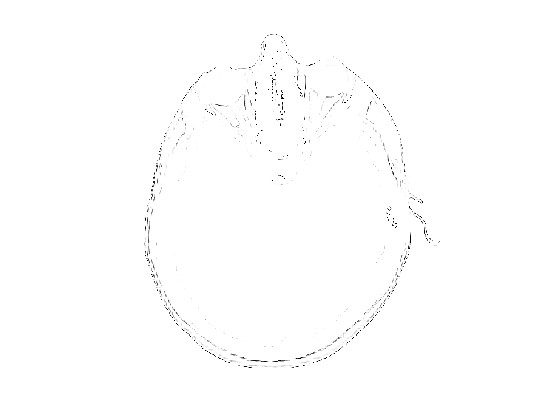

In [9]:
gray = mat2gray(g);
imshow(gray);